# Model 57

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
MODEL_NUMBER = 'M057'

In [3]:
fi = pd.DataFrame()
types = ['1JHC', '1JHN', '2JHC', '2JHN', '2JHH', '3JHC', '3JHN', '3JHH']
for t in types:
    for f in os.listdir(f'../type_results/{t}'):
        if 'fi' in f and MODEL_NUMBER in f:
            print(f)
            df = pd.read_parquet(f'../type_results/{t}/{f}')
            fi = pd.concat([fi, df])

In [4]:
# use_feats = pd.DataFrame()
# for i, d in fi.groupby('type'):
#     print(i)
#     d2 = d.groupby('feature')[['importance']].max()
#     use_feats[i] = d2['importance'] > 0.001

In [5]:
# use_feats.to_csv('../fi/Good_Features_By_Type.csv')

In [6]:
# fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20, 30))
# axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
# ax_idx = 0
# for t in use_feats.columns.tolist():
#     fi_t = fi.loc[fi['type'] == t]
#     fi_t = fi_t.loc[fi_t['importance'] >= 0.001]
#     #plt.figure(figsize=(12, 20))
#     sns.barplot(x='importance',
#                 y='feature',
#                 data=fi_t.sort_values('importance',
#                                     ascending=False),
#                ax=axes[ax_idx])
#     axes[ax_idx].set_title(f'Type {t}')
#     ax_idx += 1
# plt.show()

# Meta Feature Importance

In [7]:
fi_meta = pd.DataFrame()
types = ['1JHC', '1JHN', '2JHC', '2JHN', '2JHH', '3JHC', '3JHN', '3JHH']
for t in types:
    for f in os.listdir(f'../type_results/{t}/meta/'):
        if 'fi' in f and MODEL_NUMBER in f:
            print(f)
            df = pd.read_parquet(f'../type_results/{t}/meta/{f}')
            fi_meta = pd.concat([fi_meta, df])

M057_0804_1559_1JHC_fi_meta_fc_f1_0.5640MAE_-0.5726LMAE.parquet


In [8]:
# sns.set(style="whitegrid")
# sns.set_color_codes("pastel")

# #fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(8, 1, figsize=(30, 60))
# #axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
# #ax_idx = 0
# for t in use_feats.columns.tolist():
#     fi_t = fi_meta.loc[fi_meta['type'] == t]
#     fi_t = fi_t.loc[fi_t['importance'] >= 0.001]
#     plt.figure(figsize=(12, 20))
#     ax = sns.barplot(x='importance',
#                 y='feature',
#                 data=fi_t.sort_values('importance',
#                                     ascending=False),
#                 color="b")
#     ax.set_title(f'Type {t}')
#     #ax_idx += 1
#     plt.show()

In [9]:
fi_meta['importance'].max()

11.151420698735818

In [10]:
fi_meta['importance'].mean()


0.2427184466019413

In [11]:
fi_meta['importance'].std()

0.9308644914711408

In [12]:
use_feats_meta = pd.DataFrame()
for i, d in fi_meta.groupby('type'):
    #print(i)
    d2 = d.groupby('feature')[['importance']].max()
    use_feats_meta[i] = d2['importance'] > 0.01
use_feats_meta.sum()

1JHC    322
dtype: int64

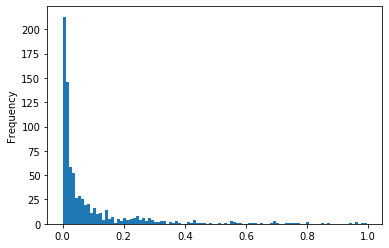

In [13]:
fi_meta.loc[fi_meta['importance'] < 1]['importance'].plot(kind='hist', bins=100)

In [14]:
#use_feats_meta.loc[use_feats_meta['3JHH'] == True].index.tolist()

In [15]:
use_feats_meta.tail()

,1JHC
feature,
val_not_1_std,True
yukawa_H.x,True
yukawa_H.y,True
yukawa_N.x,False
yukawa_O.y,True


In [16]:
use_feats_meta.shape

(412, 1)

In [17]:
#use_feats_meta.to_csv(f'../fi/FI_ANALYSIS_{MODEL_NUMBER}_GOODFEATS.csv')

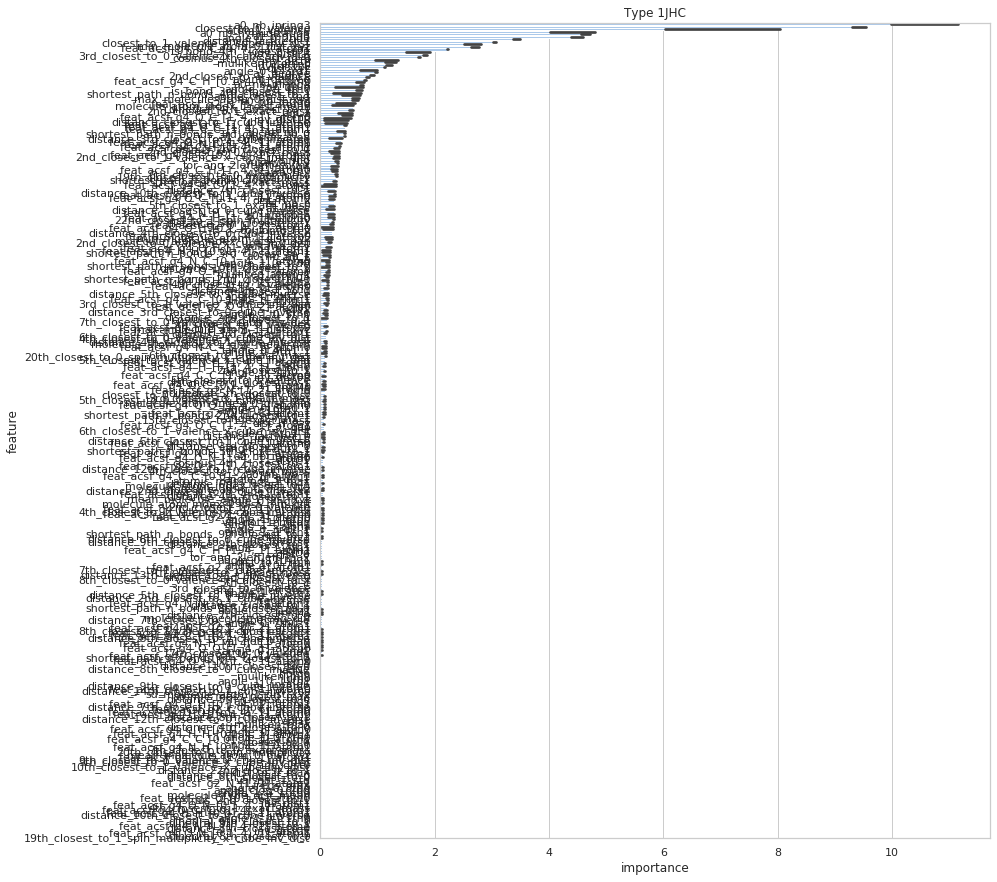

In [20]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

#fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(8, 1, figsize=(30, 60))
#axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
#ax_idx = 0
for t in use_feats_meta.columns.tolist():
    fi_t = fi_meta.loc[fi_meta['type'] == t]
    fi_t = fi_t.loc[fi_t['importance'] >= 0.01]
    plt.figure(figsize=(12, 15))
    ax = sns.barplot(x='importance',
                y='feature',
                data=fi_t.sort_values('importance',
                                    ascending=False),
                color="b")
    ax.set_title(f'Type {t}')
    #ax_idx += 1
    plt.show()

In [28]:
fi_meta.loc[fi_meta['feature'].str.contains('dihedral_')]

,feature,importance,type,fold
1,dihedral_10th_closest_to_1,0.005205,1JHC,1
3,dihedral_9th_closest_to_1,0.006728,1JHC,1
5,dihedral_8th_closest_to_1,0.007054,1JHC,1
7,dihedral_7th_closest_to_1,0.004400,1JHC,1
9,dihedral_6th_closest_to_1,0.004510,1JHC,1
11,dihedral_5th_closest_to_1,0.006530,1JHC,1
14,dihedral_4th_closest_to_1,0.574272,1JHC,1
17,dihedral_3rd_closest_to_1,0.000088,1JHC,1
23,dihedral_10th_closest_to_0,0.004066,1JHC,1
25,dihedral_9th_closest_to_0,0.005015,1JHC,1


In [25]:
fi_meta.groupby('feature').mean().sort_values('importance')

,importance,fold
feature,,
a1_nb_h,0.000000e+00,1.5
shortest_path_n_bonds_closest_to_0,0.000000e+00,1.5
25th_closest_to_0_spin_multiplicity_x_cube_inv_dist,3.510091e-08,1.5
22nd_closest_to_1_spin_multiplicity_x_cube_inv_dist,7.653298e-08,1.5
26th_closest_to_0_spin_multiplicity_x_cube_inv_dist,1.526389e-07,1.5
24th_closest_to_1_spin_multiplicity,1.248878e-06,1.5
shortest_path_n_bonds_6th_closest_to_1,2.942713e-06,1.5
shortest_path_n_bonds_8th_closest_to_1,5.297006e-06,1.5
17th_closest_to_1_spin_multiplicity,8.062506e-06,1.5
